# **Librerias**

In [80]:
#from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
import sklearn_pandas
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv
import seaborn as sns

import sys
import time


import warnings
warnings.filterwarnings('ignore')


# **Importar Datos**

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/Data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/Data/test.csv')

# Junto los dos dataframes para hacer el EDA
junto_df = pd.concat((train_df.loc[:,:], test_df.loc[:, :]))


In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# **Análisis exploratorio de los datos (EDA)**

**Número de documentos y columnas**

In [ ]:
print("Tenemos un conjunto de {} documentos (train)".format(len(train_df)))
print("El dataframe tiene {} columnas (train)".format(train_df.shape[1]))

Tenemos un conjunto de 1460 documentos (train)
El dataframe tiene 81 columnas (train)


In [ ]:
print("Tenemos un conjunto de {} documentos (test)".format(len(test_df)))
print("El dataframe tiene {} columnas (test)".format(train_df.shape[1]))

Tenemos un conjunto de 1459 documentos (test)
El dataframe tiene 81 columnas (test)


**Información estadística básica de los datos**

In [ ]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Información de las columnas**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Observo que el conjunto de datos tiene en total 81 columnas, de las cuales 38 son numéricas.

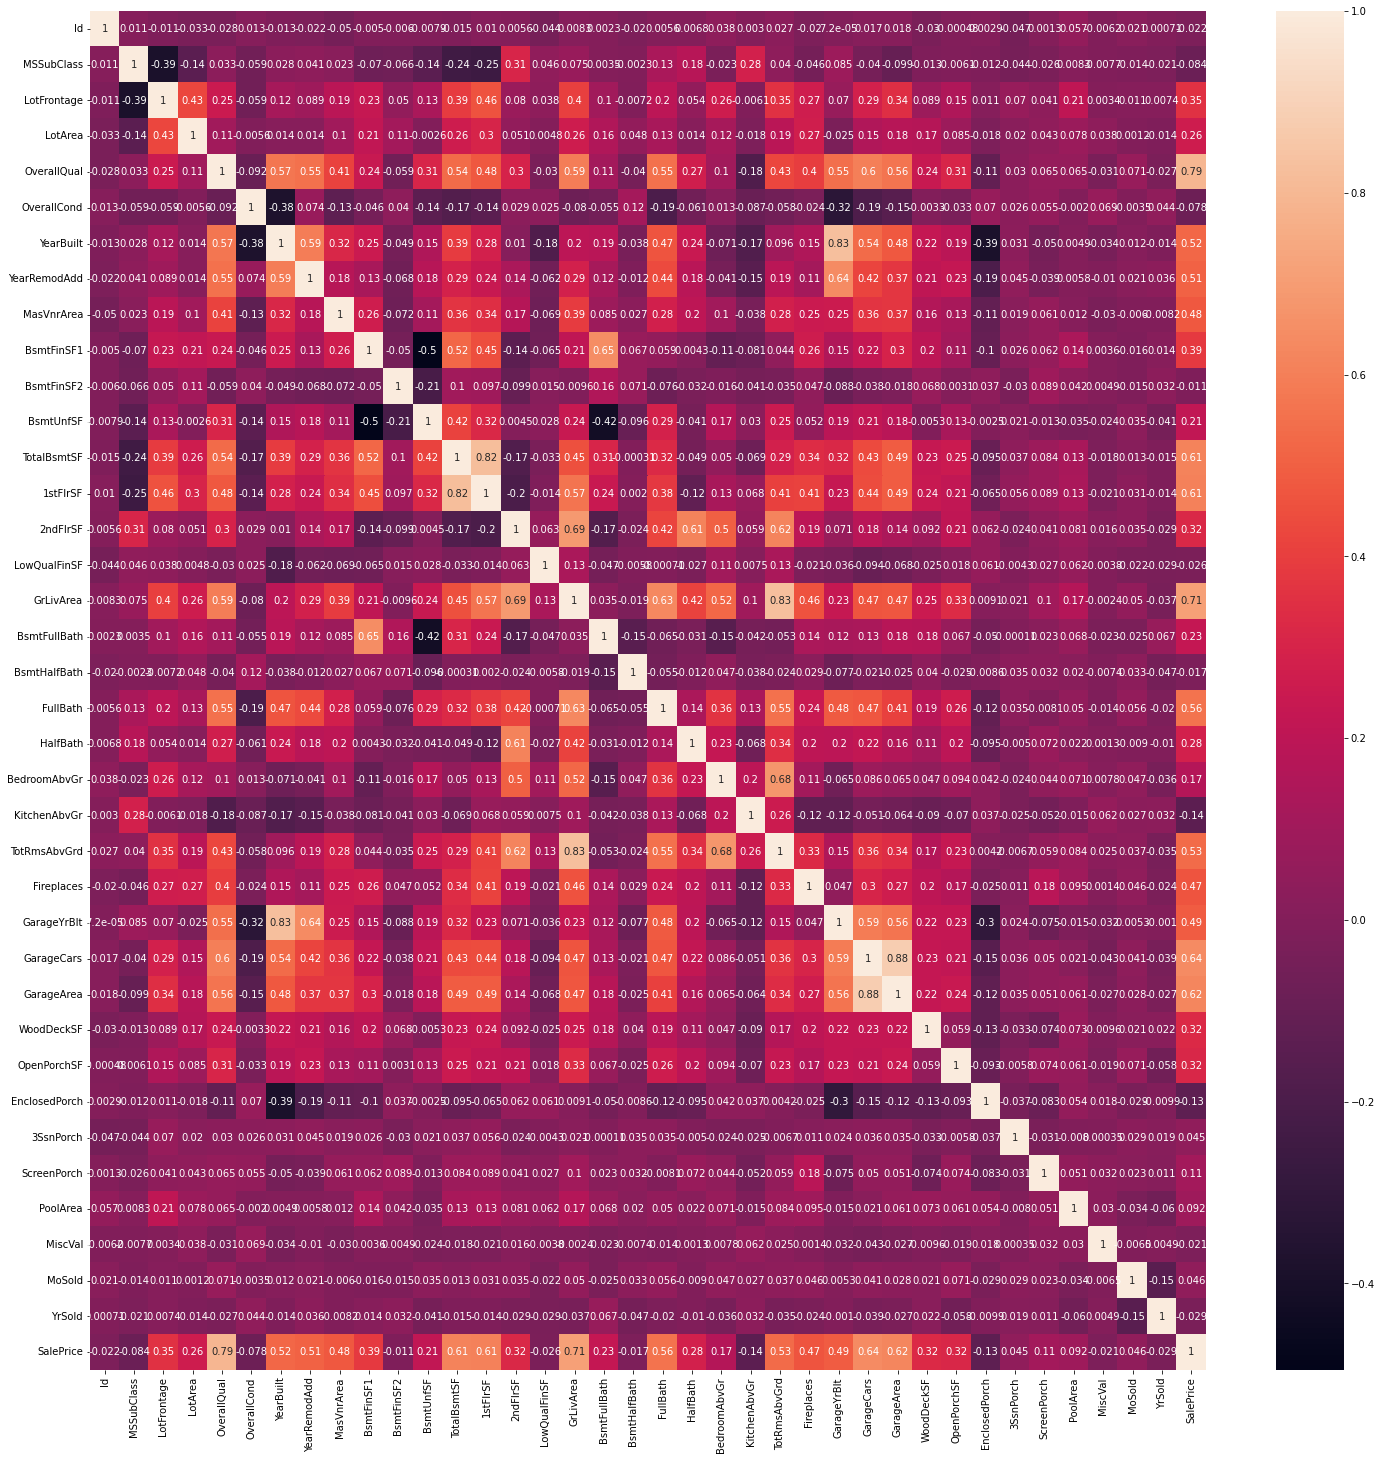

In [ ]:
correlacion = train_df.corr()

plt.subplots(figsize = (25, 25))
sns.heatmap(correlacion, annot = True)

Al desplegar la correlación entre las columnas, observo que hay muchas correlaciones, así que debo tener cuidado.

A continuación, me enfoco en las 10 variables que tienen mas correlación con la variable objetivo que es 'SalePrice'

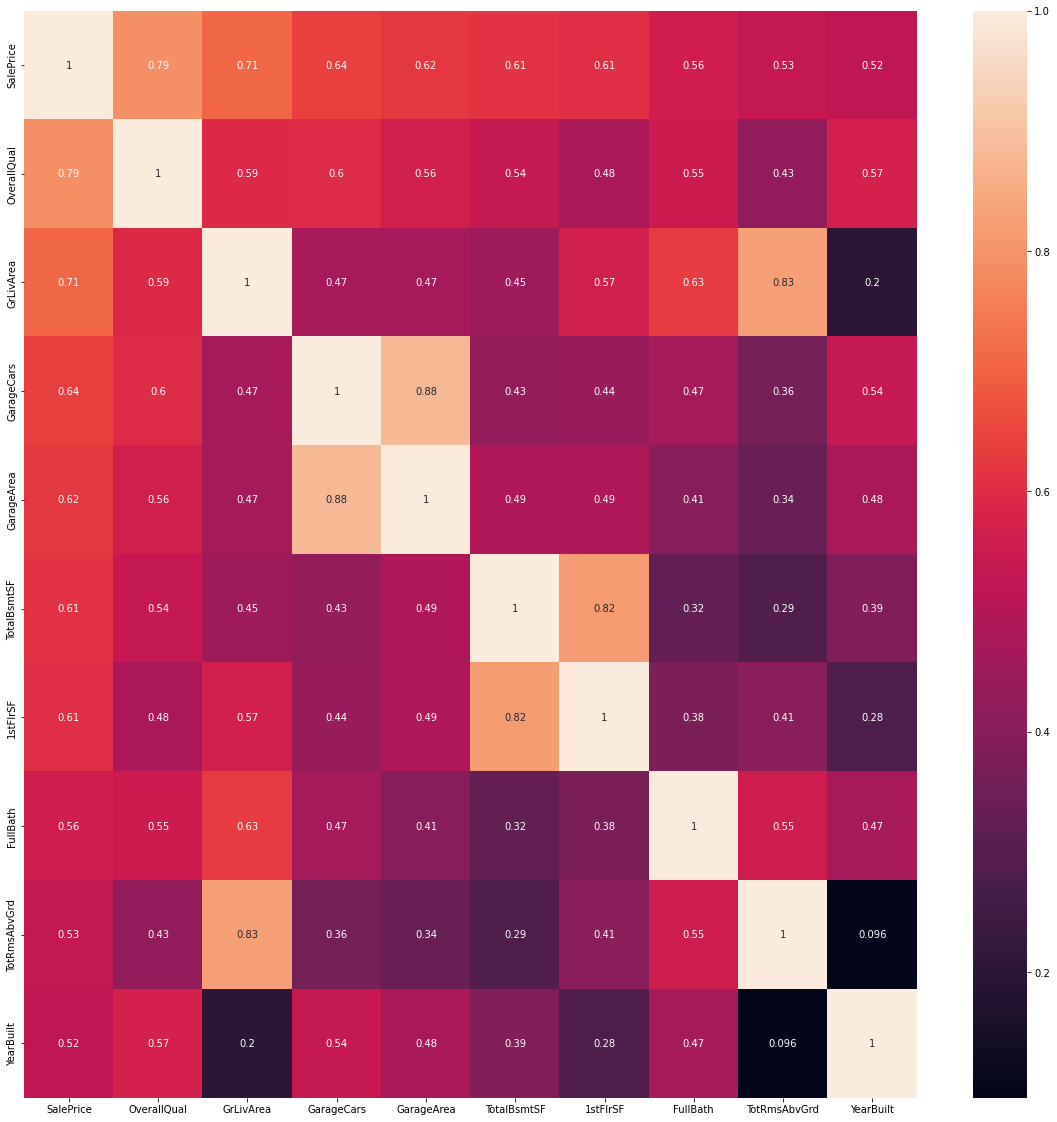

In [ ]:
correlacion_target = correlacion['SalePrice'].sort_values(ascending = False).head(10).index
correlacion_SalePrice = train_df[correlacion_target].corr()

plt.subplots(figsize = (20, 20))
sns.heatmap(correlacion_SalePrice, annot = True)

A continuación reviso los datos de las variables de arriba con 'SalePrice' usando el grafico de scatter.

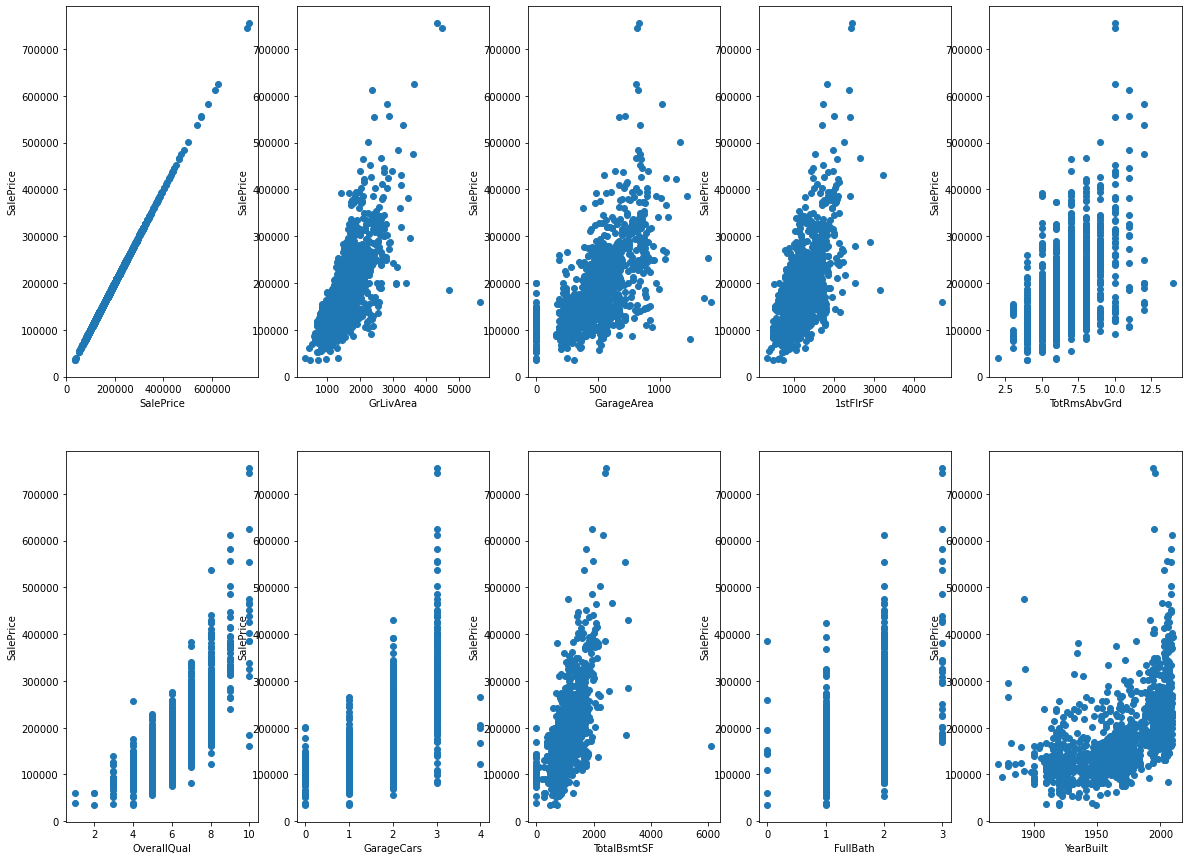

In [ ]:
fig, axs = plt.subplots(2, 5, figsize = (20, 15))
x, y = 0, 0

for col in correlacion_target:
  axs[x, y].scatter(x = train_df[col], y = train_df['SalePrice'])
  axs[x, y].set_xlabel(col)
  axs[x, y].set_ylabel('SalePrice')  
  
  x += 1  
  
  if x == 2:
    x = 0
    y += 1

Observamos lo siguiente:



*   Se puede ver que los datos TotRmsAbvGrd, OverallQual, GarageCars y FullBath son datos no numéricos
*   Los datos de GrLivArea, 1stFirSF y TotalBsmtSF muestran un patrón lineal para SalePrice.     

**A continuación, reviso la variable objetivo que es 'SalePrice'**

In [ ]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

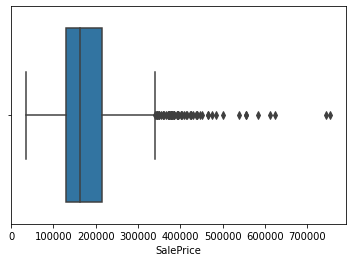

In [ ]:
sns.boxplot(train_df['SalePrice'])

En la grafica observo que hay 2 outliers (valores fuera de rango) con valor mayor a 700000.

A continuación analizaré la distribución.


In [ ]:
asimetria = train_df.SalePrice.skew()
kurtosis = train_df.SalePrice.kurt()

print("La asimetria es de {}".format(asimetria))
print("La kurtosis es de {}".format(kurtosis))


La asimetria es de 1.8828757597682129
La kurtosis es de 6.536281860064529


In [ ]:
%matplotlib inline

sns.set_style("whitegrid")
#sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
#plt.style.use('ggplot')

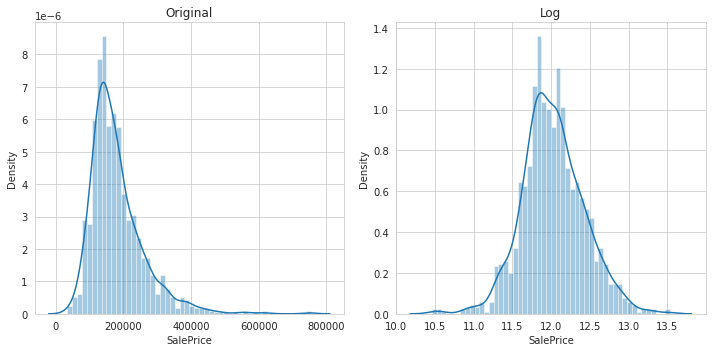

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(train_df.SalePrice, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(train_df.SalePrice), bins=50)
plt.title('Log')

plt.tight_layout()



Confirmo una distribución sesgada a la derecha, así que le aplico una transformación logaritmica para normalizarla.

**Análisis de resgistos con NaN o Missing**

In [ ]:
valores_na = [f for f in train_df.columns if train_df[f].isnull().sum()>1]
valores_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
lista_na = []
for i in valores_na: 
    x= np.round(train_df[i].isnull().mean(),2)
    print(i,  x,'% missing values')
    lista_na.append(x)

LotFrontage 0.18 % missing values
Alley 0.94 % missing values
MasVnrType 0.01 % missing values
MasVnrArea 0.01 % missing values
BsmtQual 0.03 % missing values
BsmtCond 0.03 % missing values
BsmtExposure 0.03 % missing values
BsmtFinType1 0.03 % missing values
BsmtFinType2 0.03 % missing values
FireplaceQu 0.47 % missing values
GarageType 0.06 % missing values
GarageYrBlt 0.06 % missing values
GarageFinish 0.06 % missing values
GarageQual 0.06 % missing values
GarageCond 0.06 % missing values
PoolQC 1.0 % missing values
Fence 0.81 % missing values
MiscFeature 0.96 % missing values


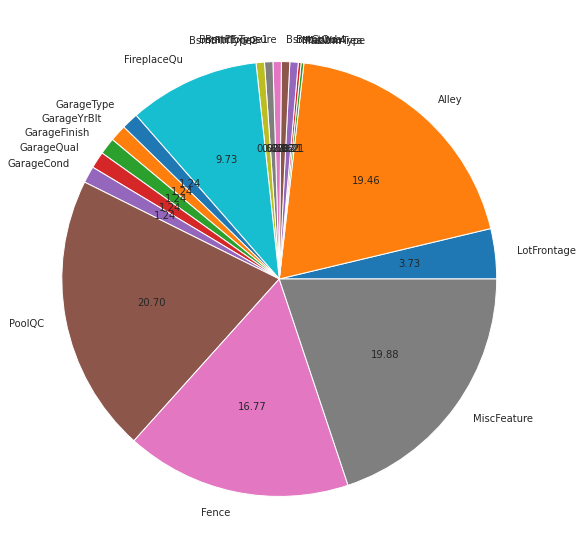

In [ ]:
plt.figure(figsize = (10,10))
plt.pie(lista_na,labels = valores_na,autopct='%.2f' )
plt.show()

In [ ]:
num_nan = train_df.isna().sum() / train_df.shape[0]


Text(0.5, 1.0, 'Columnas con el mayor numero de valores NaN')

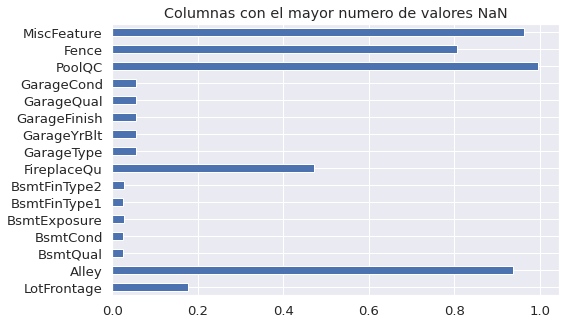

In [ ]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)
num_nan[num_nan > 0.01].plot(kind = "barh")
plt.title("Columnas con el mayor numero de valores NaN")


**Analizando las variables numéricas**

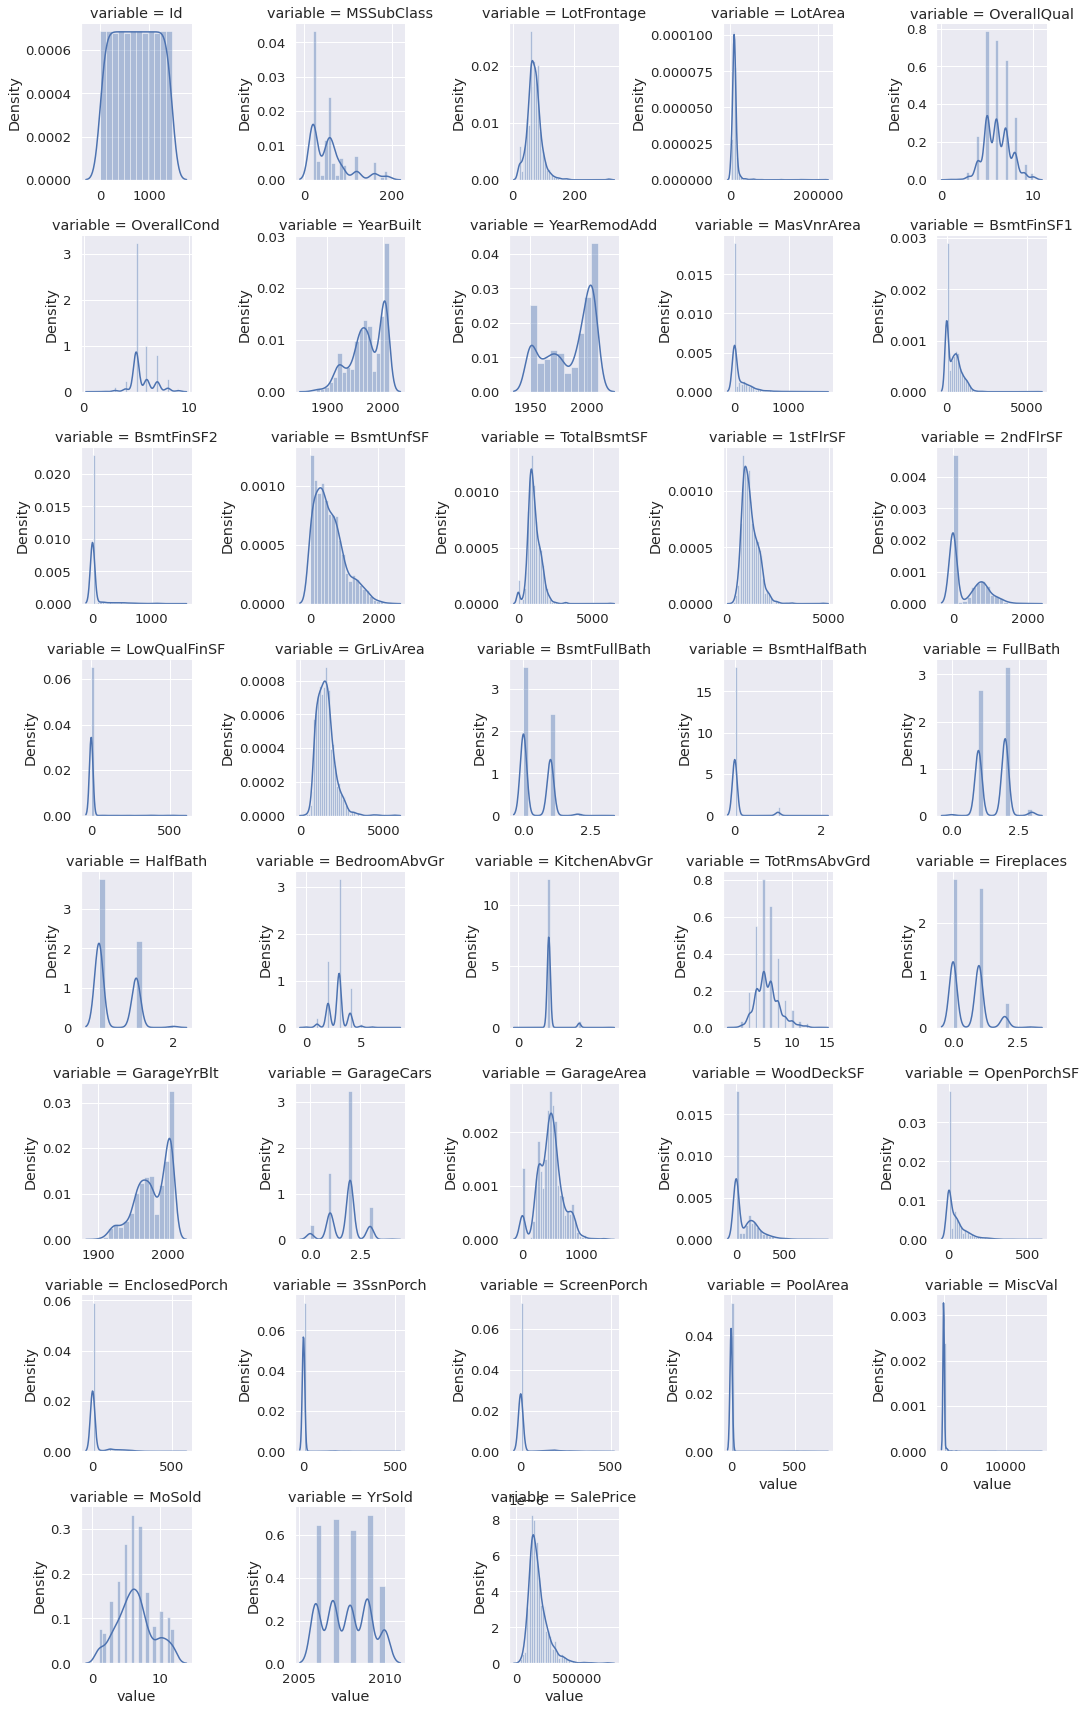

In [ ]:
quantitative = [f for f in train_df.columns if train_df.dtypes[f] != "O"]

f = pd.melt(train_df, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Observo que ninguna de las variables cuantitativas tienen una distribución normal.

Algunas variables independientes parecen buenas candidatas para la transformación logaritmica: 'TotalBsmtSF', 'KitchenAbvGr', 'LotFrontage', 'LotArea' y otras.

Si bien ganar en la transformación de regresión suavizará algunas irregularidades que podrían ser importantes, como una gran cantidad de casas con 0 2ndFlrSF. Tales irregularidades son buenas candidatas para la construcción de características.

In [ ]:
numeric_na_features = train_df.select_dtypes(np.number).loc[:, train_df.isna().sum() > 0].columns
numeric_na_features

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

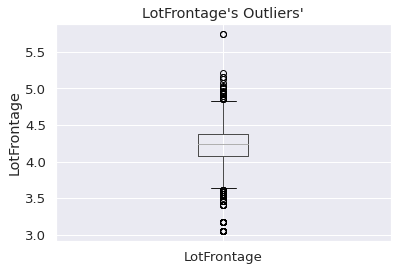

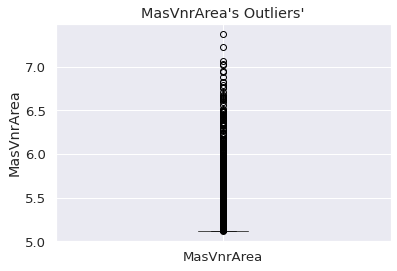

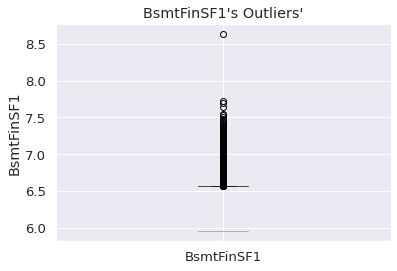

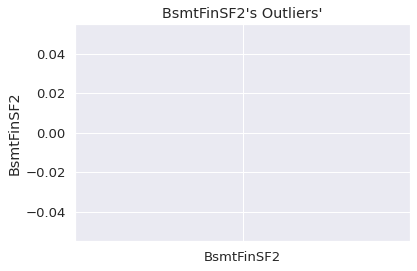

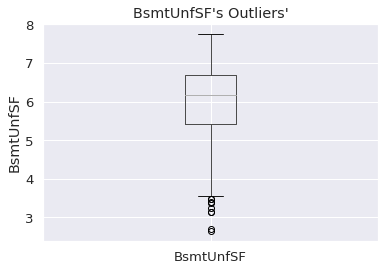

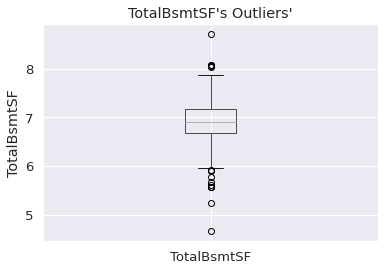

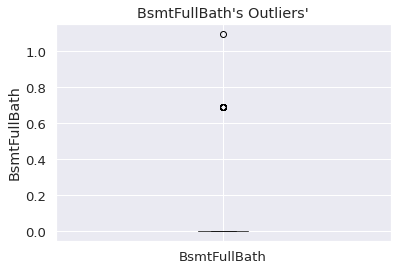

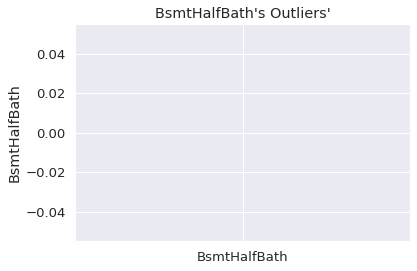

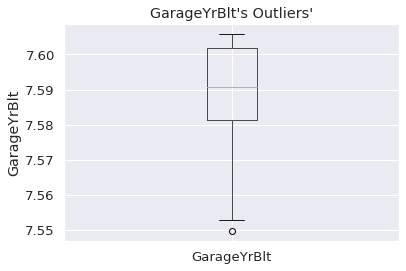

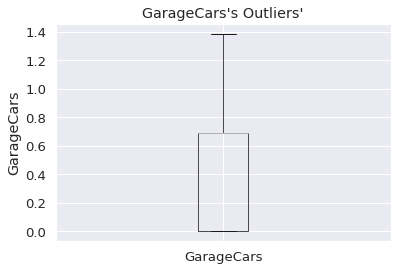

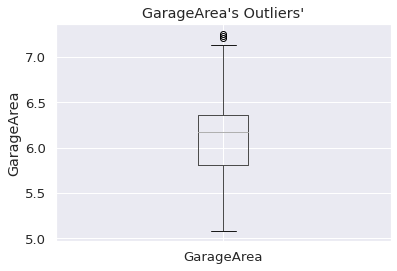

In [ ]:
numeric_na_features = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']

for feature in numeric_na_features:
    df = train_df.copy()
    df[feature] = np.log(df[feature])
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(f"{feature}'s Outliers'")
    plt.show()

Dado que las características numéricas anteriores tienen muchos valores atípicos, podemos completar los valores faltantes usando su media

**Análisis de la variable 'GrLivArea'**

In [ ]:
analisis_GrLivArea = pd.concat([train_df["SalePrice"], train_df['GrLivArea']], axis=1)
analisis_GrLivArea.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


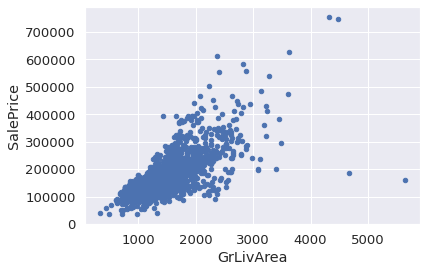

In [ ]:
analisis_GrLivArea.plot.scatter(x='GrLivArea', y='SalePrice')

**Análisis de columnas con valores NULL** 

In [ ]:
total_null = train_df.isnull().sum().sort_values(ascending = False)
porcentaje_null = (total_null / train_df.isnull().count()).sort_values(ascending = False)

valores_null = pd.concat([total_null, porcentaje_null], axis = 1, keys = ['Total de Nulos', 'Porcentaje'])
valores_null.head(20)

,Total de Nulos,Porcentaje
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


*   Las columnas **'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu' y 'LotFrontage'** tienen un porcentaje dominante porque es probable que cuando las personas compran una casa no presten atención a este aspecto y finalmente los datos anteriores son menos importantes. **Decido eliminar estas columnas.**
*   Las columnas **'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish' y 'GarageQual'** tienen el mismo porcentaje. **Decido eliminar estas columnas.** considerado que son representadas por las columnas **'GarageArea' y 'GarageCars'** que tienen alta correlación con 'SalePrice'.
*   Las columnas **'MasVnrArea' y 'MasVnrType'** puedo eliminarlas porque tienen correlación positiva con las columnas **'OverallQual' y 'YearBuilt'**.
*   La columna **'Electrical'** decido no eliminarla porque solo tiene 1 valor NULL.



In [ ]:
train_df.shape

(1460, 81)

In [ ]:
train_df_dummies = pd.get_dummies(train_df)
train_df_dummies['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# **Data Preprocessing and Data Cleaning**

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/Data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFM/Data/test.csv')

# Junto los dos dataframes para hacer el EDA
junto_df = pd.concat((train_df.loc[:,:], test_df.loc[:, :]))

In [ ]:
sns.set_style("whitegrid")

In [ ]:
target = train_df['SalePrice']
target_log = np.log1p(train_df['SalePrice'])

**Elimino outliers**

In [ ]:
#Elimino outliers solo de train
#print(train_df[train_df['SalePrice'] > 700000].index)
#train_df = train_df.drop(691)
#train_df = train_df.drop(1182)

Para aplicar las transformaciones, utilizaré el dataset donde tengo junto train y test.

In [ ]:
train_df = train_df.drop(["SalePrice"], axis=1)
junto_df = pd.concat([train_df, test_df], ignore_index=True)

Divido el dataset en 2: El primero tendrá las variables categóricas y el segundo las variables numericas

In [ ]:
categoricas = [col for col in junto_df.columns.values if junto_df[col].dtype == 'object']

categoricas_df = junto_df[categoricas]
numericas_df = junto_df.drop(categoricas, axis=1)


In [ ]:
numericas_df.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008


In [ ]:
numericas_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
categoricas_df.head(1)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


**Reducción de Asimetrías para variables numéricas**

In [ ]:
num_skew = numericas_df.apply(lambda x: skew(x.dropna()))
num_skew = num_skew[num_skew > 0.75]

#Aplico Log+1a a las variables con sesgo > 0.75
numericas_df[num_skew.index] = np.log1p(numericas_df[num_skew.index])

In [ ]:
num_skew

MSSubClass        1.375457
LotFrontage       1.502351
LotArea          12.822431
MasVnrArea        2.601240
BsmtFinSF1        1.424989
BsmtFinSF2        4.145323
BsmtUnfSF         0.919351
TotalBsmtSF       1.162285
1stFlrSF          1.469604
2ndFlrSF          0.861675
LowQualFinSF     12.088761
GrLivArea         1.269358
BsmtHalfBath      3.929996
KitchenAbvGr      4.302254
TotRmsAbvGrd      0.758367
WoodDeckSF        1.842433
OpenPorchSF       2.535114
EnclosedPorch     4.003891
3SsnPorch        11.376065
ScreenPorch       3.946694
PoolArea         16.898328
MiscVal          21.947195
dtype: float64

**Manejo de valores Missing: Variables Numericas**

In [ ]:
numericas_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [ ]:
data_len = numericas_df.shape[0]

for col in numericas_df.columns:
  total_null = numericas_df[col].isnull().sum()
  porcentaje_null = ((total_null / numericas_df[col].isnull().count())*100)
  print("{} - porcentaje nulos: {} ".format(col, porcentaje_null))


  if porcentaje_null > 80:
    print("Eliminando columna: {}".format(col))

numericas_df = numericas_df.fillna(numericas_df[col].median())



#for col in numericas_df.columns.values:
    #missing_values = numericas_df[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100))
    #porcentaje_null = (total_null / numericas_df[col].isnull().count()) 
    #print("{} - porcentaje nulos: {} ".format(col, porcentaje_null))

    # drop si tiene mas de 50 valores valores missing
    #if porcentaje_null > .80:
        #print("Eliminando columna: {}".format(col))
        #numericas_df = numericas_df.drop(col, axis = 1)



#numericas_df = numericas_df.fillna(numericas_df[col].median())
   


Id - porcentaje nulos: 0.0 
MSSubClass - porcentaje nulos: 0.0 
LotFrontage - porcentaje nulos: 16.649537512846866 
LotArea - porcentaje nulos: 0.0 
OverallQual - porcentaje nulos: 0.0 
OverallCond - porcentaje nulos: 0.0 
YearBuilt - porcentaje nulos: 0.0 
YearRemodAdd - porcentaje nulos: 0.0 
MasVnrArea - porcentaje nulos: 0.7879410757108599 
BsmtFinSF1 - porcentaje nulos: 0.0342583076396026 
BsmtFinSF2 - porcentaje nulos: 0.0342583076396026 
BsmtUnfSF - porcentaje nulos: 0.0342583076396026 
TotalBsmtSF - porcentaje nulos: 0.0342583076396026 
1stFlrSF - porcentaje nulos: 0.0 
2ndFlrSF - porcentaje nulos: 0.0 
LowQualFinSF - porcentaje nulos: 0.0 
GrLivArea - porcentaje nulos: 0.0 
BsmtFullBath - porcentaje nulos: 0.0685166152792052 
BsmtHalfBath - porcentaje nulos: 0.0685166152792052 
FullBath - porcentaje nulos: 0.0 
HalfBath - porcentaje nulos: 0.0 
BedroomAbvGr - porcentaje nulos: 0.0 
KitchenAbvGr - porcentaje nulos: 0.0 
TotRmsAbvGrd - porcentaje nulos: 0.0 
Fireplaces - porcent

In [ ]:
numericas_df.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [ ]:
numericas_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,3.820503,337.820244,9.094915,6.089072,5.564577,1971.312778,1984.264474,17.901095,4.912862,...,473.400480,2.449664,2.333006,0.757435,0.066197,0.451214,0.027361,0.234767,6.213087,2007.792737
std,842.787043,0.692436,746.594419,0.509882,1.409947,1.113131,30.291442,20.894344,177.402962,37.207439,...,217.224219,2.592335,2.154239,1.771894,0.587089,1.459808,0.410265,1.240206,2.714762,1.314964
min,1.000000,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,3.044522,4.110874,8.919854,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,3.931826,4.304065,9.154193,6.000000,5.000000,1973.000000,1993.000000,0.000000,5.913503,...,480.000000,0.000000,3.295837,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,4.262680,4.564348,9.356257,7.000000,6.000000,2001.000000,2004.000000,5.138731,6.599190,...,576.000000,5.129899,4.262680,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,5.252273,2008.000000,12.279537,10.000000,9.000000,2010.000000,2010.000000,2008.000000,2008.000000,...,2008.000000,7.261927,6.610696,6.920672,6.232448,6.357842,6.685861,9.741027,12.000000,2010.000000


**Manejo de valores Missing: Variables Categóricas**

In [ ]:
categoricas_df.isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [ ]:
data_len = categoricas_df.shape[0]

for col in categoricas_df.columns:
  total_null = categoricas_df[col].isnull().sum()
  porcentaje_null = ((total_null / categoricas_df[col].isnull().count())*100)
  
  if (porcentaje_null > 80):
    print("Eliminando columna: {} - porcentaje nulos: {}".format(col,porcentaje_null))
    categoricas_df = categoricas_df.drop(col, axis = 1)

categoricas_df = categoricas_df.fillna('No aplica')



#data_len = categoricas_df.shape[0]

#for col in categoricas_df.columns.values:
#    missing_values = categoricas_df[col].isnull().sum()
#    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100))

#    # drop si tiene mas de 50 valores missing    
#    if missing_values > 50:
#        print("Eliminando columna: {}".format(col))
#        categoricas_df = categoricas_df.drop(col, axis = 1)


#categoricas_df = categoricas_df.fillna('No aplica')


Eliminando columna: Alley - porcentaje nulos: 93.21685508735868
Eliminando columna: PoolQC - porcentaje nulos: 99.65741692360398
Eliminando columna: Fence - porcentaje nulos: 80.4385063377869
Eliminando columna: MiscFeature - porcentaje nulos: 96.40287769784173


In [ ]:
categoricas_df.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
categoricas_df.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,6,2,4,4,3,5,3,25,9,8,...,5,8,6,7,4,6,6,3,10,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,No aplica,Attchd,Unf,TA,TA,Y,WD,Normal
freq,2265,2907,1859,2622,2916,2133,2778,443,2511,2889,...,1492,2717,1420,1723,1230,2604,2654,2641,2525,2402


In [ ]:
categoricas_df_dummies = pd.get_dummies(categoricas_df)
categoricas_df_dummies.shape

(2919, 258)

In [ ]:
numericas_df.shape

(2919, 37)

In [ ]:
categoricas_df.shape

(2919, 39)

In [ ]:
datos = pd.concat([numericas_df, categoricas_df_dummies], axis=1)
#datos = pd.concat([numericas_df, categoricas_df], axis=1)

In [ ]:
datos

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_No aplica,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,5.081404,3.091042,7.568896,4,7,1970,1970,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
2915,2916,5.081404,3.091042,7.546974,4,5,1970,1970,0.000000,5.533389,...,0,0,0,1,1,0,0,0,0,0
2916,2917,3.044522,5.081404,9.903538,5,7,1960,1996,0.000000,7.110696,...,0,0,0,1,1,0,0,0,0,0
2917,2918,4.454347,4.143135,9.253591,5,5,1992,1992,0.000000,5.823046,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
train_bis = datos.iloc[:len(train_df)]
train_bis = train_bis.join(target_log)

test_bis = datos.iloc[len(train_df):]

In [ ]:
train_bis.to_pickle("/content/drive/MyDrive/Colab Notebooks/TFM/Data/Datatrain_clean.pkl")
test_bis.to_pickle("/content/drive/MyDrive/Colab Notebooks/TFM/Data/Datatest_clean.pkl")

In [ ]:
datos.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_No aplica', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_AllPub', 'Utilities_No aplica', 'Utilities_NoSeWa',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR

# **Model Training** 

In [2]:
train_bis = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/TFM/Data/Datatrain_clean.pkl")
test_bis = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/TFM/Data/Datatest_clean.pkl")

**Divido nuevamente el dataset**

In [3]:
X_train = train_bis[train_bis.columns.values[1:-1]] #[:-1]
y_train = train_bis[train_bis.columns.values[-1]]

# Quito ID
X_test = test_bis[test_bis.columns.values[1:]] #[:]

In [4]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_No aplica,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,6,5,1999,2000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,1,0
1456,3.044522,4.454347,9.486152,6,6,1978,1988,4.787492,6.673298,5.099866,...,0,0,0,1,0,0,0,0,1,0
1457,4.262680,4.204693,9.109746,7,9,1941,2006,0.000000,5.620401,0.000000,...,0,0,0,1,0,0,0,0,1,0
1458,3.044522,4.234107,9.181735,5,6,1950,1996,0.000000,3.912023,6.937314,...,0,0,0,1,0,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split
# Selecciono 80-20
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.2, random_state = 10)

**El primer modelo lo haré con Random Forest (LB: 0.14797)**

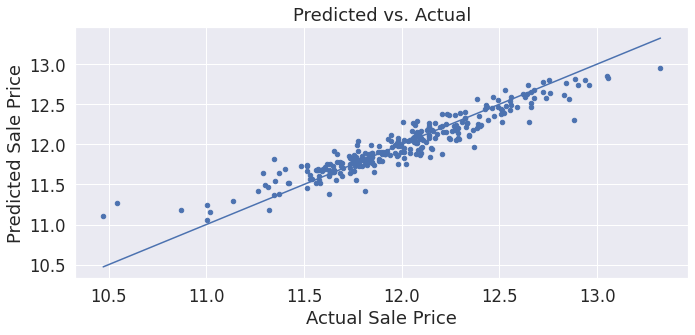

In [6]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

%matplotlib inline

modelo_RF = RandomForestRegressor(n_estimators=500, n_jobs=-1)

modelo_RF.fit(X_train1, y_train1)
rf_pred = modelo_RF.predict(X_test1)

#Gráfica
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, rf_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
MSE_RF = mean_squared_error(y_test1, rf_pred)
RMSE_RF = math.sqrt(MSE_RF)

print("RMSE-{}-CV({})={:06.5f}".format('modelo_RF', '7', RMSE_RF))
print('MSE:', MSE_RF)
print('MAE:', mean_absolute_error(y_test1, rf_pred))
print('R2: ',  r2_score(y_test1, rf_pred) * 100)

RMSE-modelo_RF-CV(7)=0.14572
MSE: 0.021233398421558705
MAE: 0.10425983326461283
R2:  87.94518975842932


In [8]:
#Aplico Cross-Validation para validar overfiting
RF_CV = cross_val_score(modelo_RF, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(RF_CV)


[-0.01875122 -0.02610794 -0.02162129 -0.01958087 -0.02407828 -0.02263052
 -0.01837887]


In [9]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_RF', '7', RF_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_RF', '7', RF_CV.std()))

Cross Validation-modelo_RF-CV(7)=-0.02159
Cross Validation-modelo_RF-CV(7)=0.00268


In [10]:
rf_pred_log = modelo_RF.predict(X_test)

#Genero el archivo test con la predicción
final_rf = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(rf_pred_log)})
final_rf.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_rf.csv", index=False)

**El segundo modelo es Regresión Lineal con regularización - RIDGE (LB: 5.08556)**

In [11]:
from sklearn.linear_model import Ridge, RidgeCV
modelo_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

def calcula_alpha(model):
    res_alpha = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 7))
    return(res_alpha)

cv_ridge = [calcula_alpha(Ridge(alpha = alpha)).mean() for alpha in alphas]

In [12]:
cv_ridge

[0.133333281903192,
 0.13248377219779514,
 0.13055668436254916,
 0.12840569036651842,
 0.12713727820287052,
 0.12682590733412344,
 0.12681063876793605,
 0.1271451579400342,
 0.12863977814930153,
 0.1306900326898795,
 0.1329467500752385]

Text(0, 0.5, 'rmse')

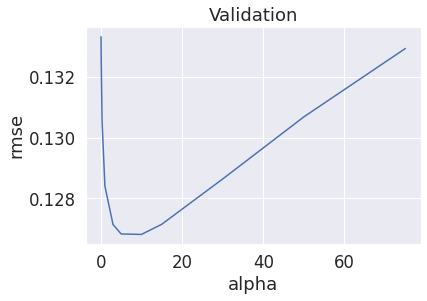

In [13]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
sns.set(font_scale=1.5)
plt.xlabel("alpha")
plt.ylabel("rmse")

In [14]:
cv_ridge.min()

0.12681063876793605

Compruebo que el error mas pequeño es con alpha=10

In [15]:
cv_ridge

0.05     0.133333
0.10     0.132484
0.30     0.130557
1.00     0.128406
3.00     0.127137
5.00     0.126826
10.00    0.126811
15.00    0.127145
30.00    0.128640
50.00    0.130690
75.00    0.132947
dtype: float64

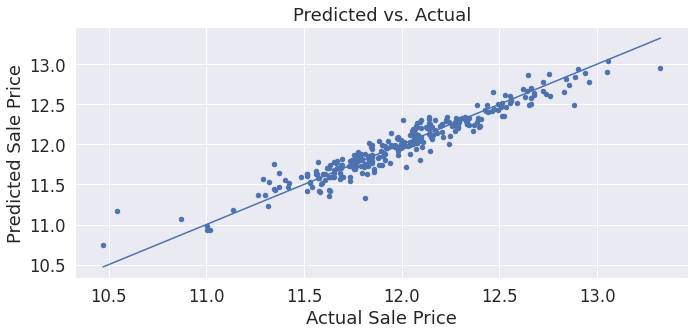

In [16]:
modelo_ridge = Ridge(alpha = 10).fit(X_train1, y_train1)
ridge_pred = modelo_ridge.predict(X_test1)

#Gráfica
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, ridge_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
MSE_ridge = mean_squared_error(y_test1, ridge_pred)
RMSE_ridge = math.sqrt(MSE_ridge)

print("RMSE-{}-CV({})={:06.5f}".format('modelo_ridge', '7', RMSE_ridge))
print('MSE:', MSE_ridge)
print('MAE:', mean_absolute_error(y_test1, ridge_pred))
print('R2: ',  r2_score(y_test1, ridge_pred) * 100)

RMSE-modelo_ridge-CV(7)=0.11938
MSE: 0.014251421378273085
MAE: 0.08757380298165025
R2:  91.90905869249289


In [18]:
#Aplico Cross-Validation para validar overfiting
ridge_CV = cross_val_score(modelo_ridge, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(ridge_CV)

[-0.01175467 -0.01744109 -0.01595574 -0.03038545 -0.01850466 -0.01686061
 -0.01443006]


In [19]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_ridge', '7', ridge_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_ridge', '7', ridge_CV.std()))

Cross Validation-modelo_ridge-CV(7)=-0.01790
Cross Validation-modelo_ridge-CV(7)=0.00549


In [20]:
ridge_pred_log = modelo_ridge.predict(X_test)

#Genero el archivo test con la predicción
final_ridge = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(ridge_pred_log)})
final_ridge.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_ridge.csv", index=False)

**Linear regression with regularisation - LASSO (LB: 3.70863)**

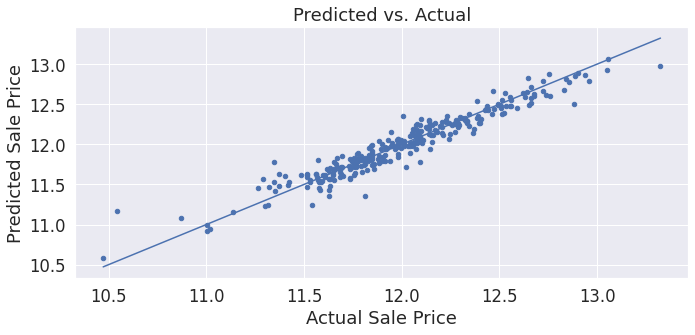

In [21]:
from sklearn.linear_model import LassoCV
modelo_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train1, y_train1)

modelo_lasso.fit(X_train1, y_train1)
lasso_pred = modelo_lasso.predict(X_test1)

#Gráfica
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, lasso_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [22]:
MSE_lasso = mean_squared_error(y_test1, lasso_pred)
RMSE_lasso = math.sqrt(MSE_lasso)

print("RMSE-{}-CV({})={:06.5f}".format('modelo_lasso', '7', RMSE_lasso))
print('MSE:', MSE_lasso)
print('MAE:', mean_absolute_error(y_test1, lasso_pred))
print('R2: ',  r2_score(y_test1, lasso_pred) * 100)

RMSE-modelo_lasso-CV(7)=0.11615
MSE: 0.01348980312441023
MAE: 0.08417541260829861
R2:  92.34145125370962


In [23]:
#Aplico Cross-Validation para validar overfiting
lasso_CV = cross_val_score(modelo_lasso, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(lasso_CV)

[-0.00966398 -0.01652754 -0.0140876  -0.02882245 -0.0189403  -0.0138106
 -0.01420282]


In [24]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_lasso', '7', lasso_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_lasso', '7', lasso_CV.std()))

Cross Validation-modelo_lasso-CV(7)=-0.01658
Cross Validation-modelo_lasso-CV(7)=0.00564


In [25]:
lasso_pred_log = modelo_lasso.predict(X_test)
final_lasso = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(lasso_pred_log)})
final_lasso.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_lasso.csv", index=False)
final_lasso.head()

,Id,SalePrice
1460,1461,119605.727846
1461,1462,149372.517903
1462,1463,182261.640453
1463,1464,199044.269686
1464,1465,198386.950926


**El cuarto modelo es Xgboost (LB: 0.13349)**

In [26]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train1, label = y_train1)
dtest = xgb.DMatrix(X_test1)

params = {"max_depth":2, "eta":0.1}
modelo_xgb = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

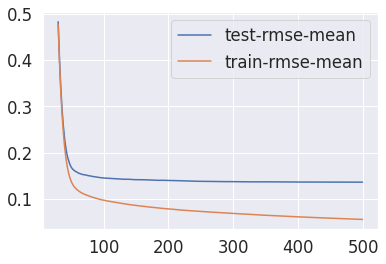

In [27]:
modelo_xgb.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

[22:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


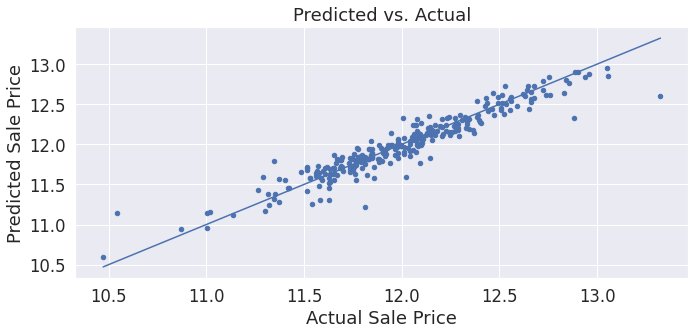

In [28]:
modelo_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)

modelo_xgb.fit(X_train1, y_train1)
xgb_pred = modelo_xgb.predict(X_test1)

#Gráfica
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, xgb_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [29]:
MSE_xgb = mean_squared_error(y_test1, xgb_pred)
RMSE_xgb = math.sqrt(MSE_xgb)

print("RMSE-{}-CV({})={:06.5f}".format('modelo_xgb', '7', RMSE_xgb))
print('MSE:', MSE_xgb)
print('MAE:', mean_absolute_error(y_test1, xgb_pred))
print('R2: ',  r2_score(y_test1, xgb_pred) * 100)

RMSE-modelo_xgb-CV(7)=0.13296
MSE: 0.01767887127545022
MAE: 0.09136342064214284
R2:  89.96319692780189


In [30]:
#Aplico Cross-Validation para validar overfiting
xgb_CV = cross_val_score(modelo_xgb, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(xgb_CV)

[22:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:13:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-0.01682735 -0.01776375 -0.01654079 -0.01353445 -0.01779906 -0.02190746
 -0.01377203]


In [31]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_xgb', '7', xgb_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_xgb', '7', xgb_CV.std()))

Cross Validation-modelo_xgb-CV(7)=-0.01688
Cross Validation-modelo_xgb-CV(7)=0.00262


In [32]:
xgb_pred_log = modelo_xgb.predict(X_test)
final_xgboost = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(xgb_pred_log)})
final_xgboost.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_xgboost.csv", index=False)
final_xgboost.head()



,Id,SalePrice
1460,1461,122442.796875
1461,1462,165021.468750
1462,1463,187404.203125
1463,1464,190348.875000
1464,1465,194944.484375


**El quinto modelo es GradientBoosting (LB: 0.22494)**

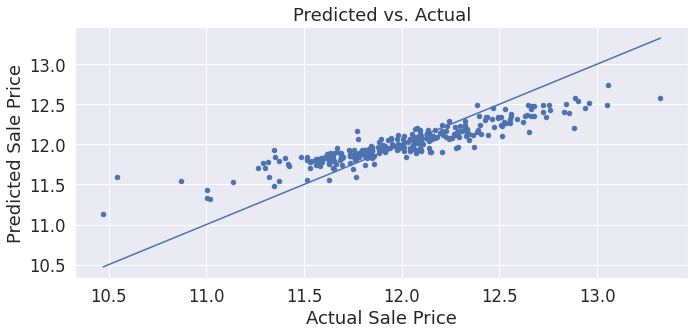

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
parametros = {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

modelo_gbr = GradientBoostingRegressor(**parametros)
modelo_gbr.fit(X_train1, y_train1)
gbr_pred = modelo_gbr.predict(X_test1)

#Gráfica
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, gbr_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()

In [34]:
MSE_gbr = mean_squared_error(y_test1, gbr_pred)
RMSE_gbr = math.sqrt(MSE_gbr)

print("RMSE-{}-CV({})={:06.5f}".format('modelo_gbr', '7', RMSE_gbr))
print('MSE:', MSE_gbr)
print('MAE:', mean_absolute_error(y_test1, gbr_pred))
print('R2: ',  r2_score(y_test1, gbr_pred) * 100)

RMSE-modelo_gbr-CV(7)=0.22132
MSE: 0.04898404656317153
MAE: 0.1669450676503121
R2:  72.19034963410498


In [35]:
#Aplico Cross-Validation para validar overfiting
gbr_CV = cross_val_score(modelo_gbr, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(gbr_CV)

[-0.04944256 -0.06388269 -0.04424684 -0.03368106 -0.04147922 -0.04858142
 -0.0369871 ]


In [49]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_gbr', '7', gbr_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_gbr', '7', gbr_CV.std()))

Cross Validation-modelo_gbr-CV(7)=-0.04547
Cross Validation-modelo_gbr-CV(7)=0.00920


In [36]:
gbr_pred_log = modelo_gbr.predict(X_test)
final_gbr = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(gbr_pred_log)})
final_gbr.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_gbr.csv", index=False)
final_gbr.head()

,Id,SalePrice
1460,1461,140322.319471
1461,1462,160013.327323
1462,1463,163922.295232
1463,1464,174641.095808
1464,1465,188171.071553


**Comparativo de resultados con los modelos anteriores**

In [39]:
print('RF - ', RMSE_RF)
print('Ridge - ', RMSE_ridge)
print('XGB - ', RMSE_xgb)
print('GBR - ', RMSE_gbr)
print('Gradient - ', RMSE_gbr)
print('Lasso - ', RMSE_lasso)


RF -  0.1457168433008302
Ridge -  0.11937931721312987
XGB -  0.1329619166357428
GBR -  0.22132339813759305
Gradient -  0.22132339813759305
Lasso -  0.11614561173118092


In [38]:
pred_rf = np.expm1(modelo_RF.predict(X_test))
pred_ridge = np.expm1(modelo_ridge.predict(X_test))
pred_xgb = np.expm1(modelo_xgb.predict(X_test))
pred_gbr = np.expm1(modelo_gbr.predict(X_test))
pred_lasso = np.expm1(modelo_lasso.predict(X_test))

predictions = pd.DataFrame({"rf":pred_rf,                             
                            "ridge":pred_ridge,
                            "xgb": pred_xgb,
                            "Gradient":pred_gbr,
                            "Lasso":pred_lasso})
#predictions.plot(x = "rf", y = "ridge", kind = "scatter")
predictions.head()

,rf,ridge,xgb,Gradient,Lasso
0,129898.487444,120037.339804,122442.796875,140322.319471,119605.727846
1,154237.927241,149846.505971,165021.468750,160013.327323,149372.517903
2,173229.510305,181027.076076,187404.203125,163922.295232,182261.640453
3,178204.668423,198034.768907,190348.875000,174641.095808,199044.269686
4,198578.935522,198684.900732,194944.484375,188171.071553,198386.950926


**Combinación de los 2 mejores: Random Forest + Xgboost (LB: Score: 0.13145)**

Los 2 modelos los selecciono en base al score que me dió Kaggle

In [40]:
combinacio_rf_xgb = 0.4*pred_rf + 0.6*pred_xgb
final_rf_xgb = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':combinacio_rf_xgb})
final_rf_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_rf_xgb.csv", index=False)
final_rf_xgb.head()

,Id,SalePrice
1460,1461,125425.074665
1461,1462,160708.053709
1462,1463,181734.327560
1463,1464,185491.195494
1464,1465,196398.269521


# **Hiperparámetros**

A continuación, los hiperparámetros de los modelos individuales los optimizaré con validación cruzada. 

In [81]:
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [82]:
def rmse_cv(modelo, X_train1, y_train1):
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    rmse = np.sqrt(-cross_val_score(modelo, X_train1, y_train1, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse)

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))    

In [83]:
folds = 5
seed = 7

**Decision Tree Regressor con hiperparámetros (LB: )**

In [84]:
from sklearn.tree import DecisionTreeRegressor


# tunning
modelo_DTR_hp = DecisionTreeRegressor()

param_grid = {
        'max_depth': range(2, 11, 2), 
        'min_samples_split': [2, 3, 4],
        'min_samples_leaf': range(1, 20, 5),
        'max_leaf_nodes': range(2, 20, 5)
}

kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)

scorer = make_scorer(rmse, greater_is_better=False)
grid_search = GridSearchCV(modelo_DTR_hp, param_grid, n_jobs=-1, cv=kfold, verbose=1, scoring=scorer)
grid_result = grid_search.fit(X_train1, y_train1)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))
  print("{:06.5f} ({:06.5f}) with {}".format(mean, stdev, param))

# Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
-0.286572 (0.026241) with: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
-0.28657 (0.02624) with {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
-0.286572 (0.026241) with: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}
-0.28657 (0.02624) with {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}
-0.286572 (0.026241) with: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}
-0.28657 (0.02624) with {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}
-0.286572 (0.026241) with: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 6, 'min_samples_split': 2}
-0.28657 (0.02624) with {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 6, 'min_samples_split': 2}
-0.286572 (0.026241) with: {'max_depth': 2, 'max_lea

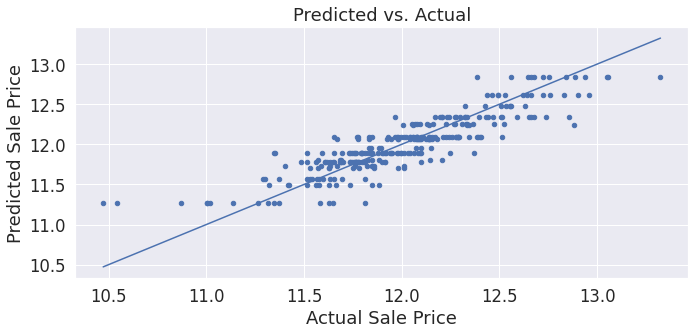

In [47]:
# Modelo
modelo_DTR_hp = DecisionTreeRegressor(max_depth=6, min_samples_split=2, max_leaf_nodes=17, min_samples_leaf=16)

# Fit & Predict
modelo_DTR_hp.fit(X_train1, y_train1)
DTR_hp_pred = modelo_DTR_hp.predict(X_test1)

#Gráfica
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, DTR_hp_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()



In [58]:
RMSE_DTR_hp = rmse_cv(modelo_DTR_hp, X_train1, y_train1)

print("RMSE-{}-CV({})={:06.5f}+-{:06.5f}".format('modelo_DTR_hp', folds, RMSE_DTR_hp.mean(), RMSE_DTR_hp.std()))
print('MAE:', mean_absolute_error(y_test1, DTR_hp_pred))
print('R2: ',  r2_score(y_test1, DTR_hp_pred) * 100)

RMSE-modelo_DTR_hp-CV(5)=0.20602+-0.01785
MAE: 0.1477797131877106
R2:  77.93924991143817


In [59]:
#Aplico Cross-Validation para validar overfiting
DTR_hp_CV = cross_val_score(modelo_DTR_hp, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(DTR_hp_CV)

[-0.03732444 -0.05285311 -0.04412103 -0.03893573 -0.03610247 -0.04060719
 -0.04033283]


In [60]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_DTR_hp', '7', DTR_hp_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_DTR_hp', '7', DTR_hp_CV.std()))

Cross Validation-modelo_DTR_hp-CV(7)=-0.04147
Cross Validation-modelo_DTR_hp-CV(7)=0.00522


In [61]:
# Predicción
DTR_hp_pred_log = modelo_DTR_hp.predict(X_test)
final_DTR_hp = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(DTR_hp_pred_log)})
final_DTR_hp.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_dtr_hp.csv", index=False)
final_DTR_hp.head()

,Id,SalePrice
1460,1461,130033.738821
1461,1462,145915.253477
1462,1463,177380.975424
1463,1464,177380.975424
1464,1465,206778.410427


**Random Forest Regressor con hiperparámetros (LB: 0.14227)**

In [62]:
# tunning
modelo_RF_hp = RandomForestRegressor()


param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [100, 500, 1000],
    'max_features': [5, 50]
}

kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)

scorer = make_scorer(rmse, greater_is_better=False)
grid_search = GridSearchCV(modelo_RF_hp, param_grid, n_jobs=-1, cv=kfold, verbose=1, scoring=scorer)
grid_result = grid_search.fit(X_train1, y_train1)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("{:06.5f} ({:06.5f}) with {}".format(mean, stdev, param))

# Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
-0.16313 (0.02516) with {'bootstrap': True, 'max_features': 5, 'n_estimators': 100}
-0.16232 (0.02556) with {'bootstrap': True, 'max_features': 5, 'n_estimators': 500}
-0.16134 (0.02521) with {'bootstrap': True, 'max_features': 5, 'n_estimators': 1000}
-0.14109 (0.01992) with {'bootstrap': True, 'max_features': 50, 'n_estimators': 100}
-0.13944 (0.02004) with {'bootstrap': True, 'max_features': 50, 'n_estimators': 500}
-0.13898 (0.02012) with {'bootstrap': True, 'max_features': 50, 'n_estimators': 1000}
-0.15829 (0.02341) with {'bootstrap': False, 'max_features': 5, 'n_estimators': 100}
-0.15507 (0.02376) with {'bootstrap': False, 'max_features': 5, 'n_estimators': 500}
-0.15560 (0.02429) with {'bootstrap': False, 'max_features': 5, 'n_estimators': 1000}
-0.13762 (0.01932) with {'bootstrap': False, 'max_features': 50, 'n_estimators': 100}
-0.13582 (0.01846) with {'bootstrap': False, 'max_features': 50, 'n_estimators': 500}
-0

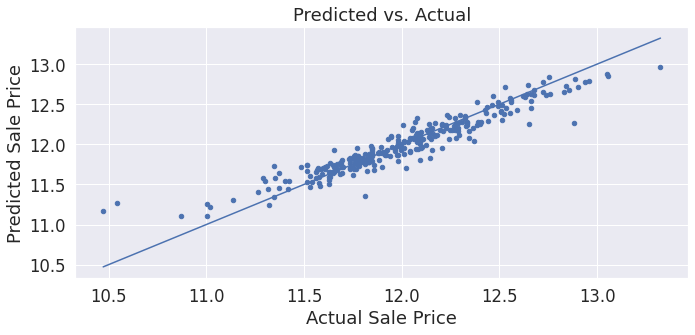

In [63]:
# Modelo
modelo_RF_hp = RandomForestRegressor(max_features=50, n_estimators=500, bootstrap=False)

# Fit & Predict
modelo_RF_hp.fit(X_train1, y_train1)
RF_hp_pred = modelo_RF_hp.predict(X_test1)

#Gráfica
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, RF_hp_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()



In [64]:
RMSE_RF_hp = rmse_cv(modelo_RF_hp, X_train1, y_train1)

print("RMSE-{}-CV({})={:06.5f}+-{:06.5f}".format('modelo_RF_hp', folds, RMSE_RF_hp.mean(), RMSE_RF_hp.std()))
print('MAE:', mean_absolute_error(y_test1, RF_hp_pred))
print('R2: ',  r2_score(y_test1, RF_hp_pred) * 100)

RMSE-modelo_RF_hp-CV(5)=0.13617+-0.01895
MAE: 0.09567083772785111
R2:  89.21151259582197


In [65]:
#Aplico Cross-Validation para validar overfiting
RF_hp_CV = cross_val_score(modelo_RF_hp, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(RF_hp_CV)

[-0.01790453 -0.02292369 -0.01972807 -0.01627618 -0.02074941 -0.01838115
 -0.01648799]


In [66]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_DTR_hp', '7', RF_hp_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_DTR_hp', '7', RF_hp_CV.std()))

Cross Validation-modelo_DTR_hp-CV(7)=-0.01892
Cross Validation-modelo_DTR_hp-CV(7)=0.00221


In [67]:
# Predicción
RF_hp_pred_log = modelo_RF_hp.predict(X_test)
final_RF_hp = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(RF_hp_pred_log)})
final_RF_hp.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_RF_hp.csv", index=False)
final_RF_hp.head()

,Id,SalePrice
1460,1461,125339.367351
1461,1462,151481.416389
1462,1463,178850.092723
1463,1464,185370.872934
1464,1465,190687.914423


**Xgboost con hiperparámetros (LB: )**

In [85]:
# tunning
modelo_xgb_hp = xgb.XGBRegressor()

param_grid = {
    'max_depth': [2, 4], 
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'min_child_weight': range(1, 10, 2),
    'n_estimators': range(50, 300, 50),
    'objective': ['reg:linear']
}

kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)

scorer = make_scorer(rmse, greater_is_better=False)
grid_search = GridSearchCV(modelo_xgb_hp, param_grid, n_jobs=-1, cv=kfold, verbose=1, scoring=scorer)
grid_result = grid_search.fit(X_train1, y_train1)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("{:06.5f} ({:06.5f}) with {}".format(mean, stdev, param))

# Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[02:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-11.47781 (0.02003) with {'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'reg:linear'}
-11.42069 (0.02006) with {'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'reg:linear'}
-11.36385 (0.02008) with {'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 150, 'objective': 'reg:linear'}
-11.30730 (0.02011) with {'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 200, 'objective': 'reg:linear'}
-11.25103 (0.02013) with {'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 250, 'objective': 'reg:linear'}
-11.47781 (0.02003) with {'learning_rate': 0.0001, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 50, 'objective

[22:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


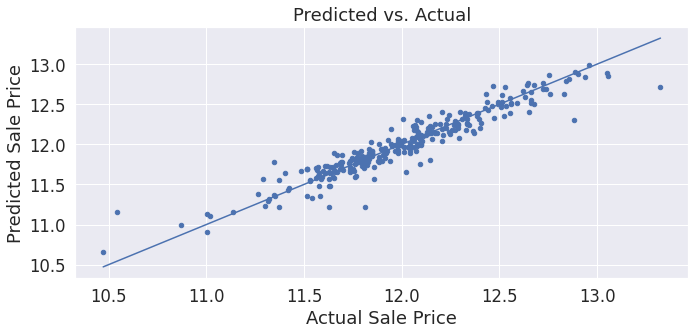

In [69]:
# Model
modelo_xgb_hp = xgb.XGBRegressor(n_estimators=250,learning_rate=0.2,max_depth=2,min_child_weight=1,objective='reg:linear')

# Fit & Predict
modelo_xgb_hp.fit(X_train1, y_train1, verbose=True)
xgb_hp_pred = modelo_xgb_hp.predict(X_test1)

#Gráfica
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, xgb_hp_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()




In [70]:
RMSE_xgb_hp = rmse_cv(modelo_xgb_hp, X_train1, y_train1)

print("RMSE-{}-CV({})={:06.5f}+-{:06.5f}".format('modelo_xgb_hp', folds, RMSE_xgb_hp.mean(), RMSE_xgb_hp.std()))
print('MAE:', mean_absolute_error(y_test1, xgb_hp_pred))
print('R2: ',  r2_score(y_test1, xgb_hp_pred) * 100)

[22:54:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE-modelo_xgb_hp-CV(5)=0.13079+-0.01360
MAE: 0.09004644192419467
R2:  90.14607938360028


In [71]:
#Aplico Cross-Validation para validar overfiting
xgb_hp_CV = cross_val_score(modelo_xgb_hp, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(xgb_hp_CV)

[22:55:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[-0.01413313 -0.01670956 -0.01727394 -0.01123418 -0.01868619 -0.02442883
 -0.01492614]


In [72]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_xgb_hp', '7', xgb_hp_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_xgb_hp', '7', xgb_hp_CV.std()))

Cross Validation-modelo_xgb_hp-CV(7)=-0.01677
Cross Validation-modelo_xgb_hp-CV(7)=0.00385


In [73]:
# Predicción
xgb_hp_pred_log = modelo_xgb_hp.predict(X_test)
final_xgb_hp = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(xgb_hp_pred_log)})
final_xgb_hp.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_xgb_hp.csv", index=False)

**Linear regression con hiperparametros - LASSO (LB: 3.94333)**

In [74]:
from sklearn import linear_model

# tunning
modelo_lasso_hp = linear_model.Lasso()

param_grid = {
    'alpha': [0.00001, 0.001, 0.1, 1, 10, 50, 100], 
    'max_iter': [100, 1000, 10000]
}

kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)

scorer = make_scorer(rmse, greater_is_better=False)
grid_search = GridSearchCV(modelo_lasso_hp, param_grid, n_jobs=-1, cv=kfold, verbose=1, scoring=scorer)
grid_result = grid_search.fit(X_train1, y_train1)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("{:06.5f} ({:06.5f}) with {}".format(mean, stdev, param))

# Resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
-0.13760 (0.02536) with {'alpha': 1e-05, 'max_iter': 100}
-0.13834 (0.02557) with {'alpha': 1e-05, 'max_iter': 1000}
-0.13834 (0.02557) with {'alpha': 1e-05, 'max_iter': 10000}
-0.13170 (0.01738) with {'alpha': 0.001, 'max_iter': 100}
-0.13170 (0.01737) with {'alpha': 0.001, 'max_iter': 1000}
-0.13170 (0.01737) with {'alpha': 0.001, 'max_iter': 10000}
-0.22124 (0.02387) with {'alpha': 0.1, 'max_iter': 100}
-0.22124 (0.02387) with {'alpha': 0.1, 'max_iter': 1000}
-0.22124 (0.02387) with {'alpha': 0.1, 'max_iter': 10000}
-0.26627 (0.02517) with {'alpha': 1, 'max_iter': 100}
-0.26627 (0.02517) with {'alpha': 1, 'max_iter': 1000}
-0.26627 (0.02517) with {'alpha': 1, 'max_iter': 10000}
-0.30278 (0.02383) with {'alpha': 10, 'max_iter': 100}
-0.30278 (0.02383) with {'alpha': 10, 'max_iter': 1000}
-0.30278 (0.02383) with {'alpha': 10, 'max_iter': 10000}
-0.38079 (0.02712) with {'alpha': 50, 'max_iter': 100}
-0.38079 (0.02712) with {

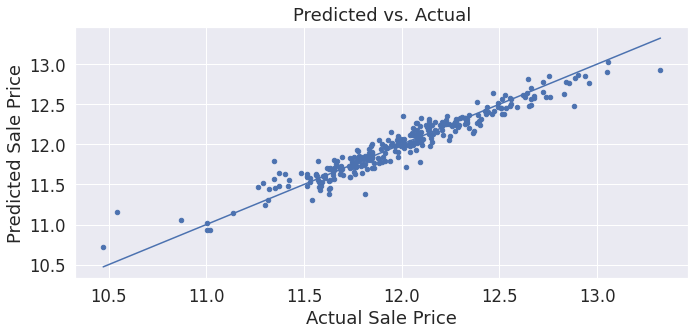

In [75]:
# Model
modelo_lasso_hp = linear_model.Lasso(alpha= 0.001, max_iter=100)

# Fit & Predict
modelo_lasso_hp.fit(X_train1, y_train1)
lasso_hp_pred = modelo_lasso_hp.predict(X_test1)

#Gráfica
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, lasso_hp_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()




In [76]:
RMSE_lasso_hp = rmse_cv(modelo_lasso_hp, X_train1, y_train1)

print("RMSE-{}-CV({})={:06.5f}+-{:06.5f}".format('modelo_lasso_hp', folds, RMSE_lasso_hp.mean(), RMSE_lasso_hp.std()))
print('MAE:', mean_absolute_error(y_test1, lasso_hp_pred))
print('R2: ',  r2_score(y_test1, lasso_hp_pred) * 100)

RMSE-modelo_lasso_hp-CV(5)=0.13170+-0.01738
MAE: 0.08711295333223157
R2:  92.00689463243411


In [77]:
#Aplico Cross-Validation para validar overfiting
lasso_hp_CV = cross_val_score(modelo_lasso_hp, X_train1, y_train1, scoring="neg_mean_squared_error", cv = 7)
print(lasso_hp_CV)

[-0.01111062 -0.01897993 -0.01524472 -0.02840603 -0.01870155 -0.01590772
 -0.01279167]


In [79]:
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_lasso_hp', '7', lasso_hp_CV.mean()))
print("Cross Validation-{}-CV({})={:06.5f}".format('modelo_lasso_hp', '7', lasso_hp_CV.std()))

Cross Validation-modelo_lasso_hp-CV(7)=-0.01731
Cross Validation-modelo_lasso_hp-CV(7)=0.00525


In [78]:
# Predicción
lasso_hp_pred_log = modelo_lasso_hp.predict(X_test)
final_lasso_hp = pd.DataFrame({'Id':test_bis['Id'], 'SalePrice':np.expm1(lasso_hp_pred_log)})
final_lasso_hp.to_csv("/content/drive/MyDrive/Colab Notebooks/TFM/Data/final_lasso_hp.csv", index=False)

#**Guardo el modelo**

Decido guardar el modelo para no tener que reentrenarlo nada vez que lo utilizo

In [ ]:
import joblib

modelo_final = modelo_RF_hp
joblib.dump(modelo_final, '/content/drive/MyDrive/Colab Notebooks/TFM/Data/modelo_RF_hp.pkl')

['/content/drive/MyDrive/Colab Notebooks/TFM/Data/modelo_RF_hp.pkl']

In [ ]:
modelo_final = modelo_xgb
print(modelo_final)

XGBRegressor(max_depth=2, n_estimators=360)


In [ ]:
import pickle
file_name = '/content/drive/MyDrive/Colab Notebooks/TFM/Data/modelo_final_xgb.pkl'
# save
pickle.dump(modelo_final, open(file_name, "wb"))